# Final HW: Problem 1
## Double (and more) pendulum

Implements a DoublePendulum Class which is then used to solve Lagrange's equations and generate
some basic plots for a double pendulum.

* Last revised 1-May-2021 by Nathan Lachner (lachner.3@osu.edu).

We define our double pendulum using the coordinate system suggested by this image from https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg


The y-axis is defined as pointing down from the ceiling and the x-axis is defined as pointing right from the pivot.
We'll also be using $\phi$, rather than $\theta$ to represent our angles.

Since we'll be solving this system with Lagrange's equations, we'll need the components of each bob's position and velocity. We can write these in terms of the angles $\phi_1$ and $\phi_2$ as:

$x_1 = L_1\sin\phi_1 \quad \Rightarrow \quad \dot x_1 = L_1\dot\phi_1\cos\phi_1$ <br>
$y_1 = L_1\cos\phi_1 \quad \Rightarrow \quad \dot y_1 = -L_1\dot\phi_1\sin\phi_1$ <br>
$x_2 = x_1 + L_2\sin\phi_2 \quad \Rightarrow \quad \dot x_2 = L_1\dot\phi_1\cos\phi_1 + L_2\dot\phi_2\cos\phi$ <br>
$y_2 = y_1 + L_2\cos\phi_2 \quad \Rightarrow \quad \dot y_2 = -L_1\dot\phi_1\sin\phi_1 - L_2\dot\phi_2\sin\phi_2$ <br>
<br>

From these, the kinetic energy is easy enough to write:

$\begin{align}
    T &= \frac{1}{2}m_1(\dot x_1^2 + \dot y_1^2) + \frac{1}{2}m_2(\dot x_2^2 + \dot y_2^2) \\
          &= \frac{1}{2}(m_1 + m_2)L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 \cos(\phi_1 - \phi_2) + \frac{1}
          {2}m_2L_2^2 \dot\phi_2^2
\end{align}$
<br>

And as for the potential energy, it is exclusively due to gravity, and requires that we flip the sign because the y-axis points downwards:

$\begin{align}
    U &= -m_1 g y_1 - m_2 g y_2 \\
          &= -(m_1 + m_2) g L_1\cos\phi_1 - m_2 g L_2\cos\phi_2
\end{align}$
<br>

This gives us a Lagrangian, $\mathcal{L} = T - U$: <br>

$\mathcal{L} = \frac{1}{2}(m_1 + m_2)L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 \cos(\phi_1 - \phi_2) + \frac{1}
          {2}m_2L_2^2 \dot\phi_2^2 + (m_1 + m_2) g L_1\cos\phi_1 + m_2 g L_2\cos\phi_2$
<br>

We can now plug this into the Euler-Lagrange Equations: <br>

$\begin{align}
\frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot q_i} - \frac{\partial\mathcal L}{\partial q_i} = 0
\end{align}$

Where $q_i = \phi_1, \phi_2$



After a fair whack of calculus and algebra (thanks Mathematica!), we obtain the two equations of motion: <br>

$L_1^2 (m_1 + m_2)\ddot\phi_1 + L_1 L_2 m_2 \ddot\phi_2\cos(\phi_1 - \phi_2) + g L_1 (m_1 + m_2)\sin\phi_1 + L_1 L_2 m_2 \dot\phi_2^2\sin(\phi_1 - \phi_2) = 0$ <br>

$L_2^2 m_2 \ddot\phi_2 + L_1 L_2 m_2 \ddot\phi_1\cos(\phi_1 - \phi_2) - L_1 L_2 m_2 \dot\phi_1^2\sin(\phi_1 - \phi_2) + g L_2 m_2 \sin\phi_2 = 0$ <br>


Now, these are fairly unwieldly in their current form. But we can rewrite them in the matrix form $\textbf{A}\boldsymbol{\ddot\phi} = \textbf{b}$, where: <br>

$\textbf{A} = \begin{pmatrix}
               L_1^2(m_1+m_2) & L_1 L_2 m_2\cos(\phi_1-\phi_2) \\
                L_1 L_2 m_2\cos(\phi_1-\phi_2) & L_2^2 m_2 \\
                \end{pmatrix}, \quad
                \boldsymbol{\ddot\phi} = \left(\begin{array}{c}
                                     \ddot\phi_1 \\
                                     \ddot\phi_2 \\
                                     \end{array}\right), \quad
                                     \textbf{b} = \left(\begin{array}{c}
                                     -L_1 L_2 m_2\sin(\phi_1 - \phi_2)\dot\phi_2^2 - g L_1(m_1 + m_2)\sin\phi_1 \\
                                     L_1 L_2 m_2\sin(\phi_1 - \phi_2)\dot\phi_1^2 - g L_2 m_2\sin\phi_2 \\
                                     \end{array}\right)$ <br>
                                     
We can then solve for $\boldsymbol{\ddot\phi}$ via inverting $\textbf{A}$: $\quad\boldsymbol{\ddot\phi} = \textbf{A}^{-1} \textbf{b}$


This is effectively the equation our DoublePendulum class will need to implement. The only snag is that the ODE solver within scipy, solve_ivp, requires our equation to be in the form of a coupled system of first-order differential equations. This is easily remedied by introducing the vector: <br>

$\textbf{y} = \left(\begin{array}{c}
                          \phi_1 \\
                          \phi_2 \\
                          \dot\phi_1 \\
                          \dot\phi_2
                          \end{array}\right) \;$ where $\begin{align}\frac{d\mathbf{y}}{dt} = \end{align}\left(\begin{array}{c}
                                                                                                              \dot\phi_1 \\
                                                                                                              \dot\phi_2 \\
                                                                                                              \ddot\phi_1 \\
                                                                                                              \ddot\phi_2
                                                                                                            \end{array}\right)$
<br>

With this vector, we can treat our system of two coupled second-order ODEs as a system of four coupled first-order ODE's, where the extra two equations are simply: <br>

$\begin{align}\dot\phi_1 = \frac{d\phi_1}{dt}\end{align}$ and $\begin{align}\dot\phi_2 = \frac{d\phi_2}{dt}\end{align}$ <br>

We proceed with the implementation.

In [1]:
# set matplotlib to print graphs inline
%matplotlib inline

# import the necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
from scipy import linalg as LA
import matplotlib.pyplot as plt

# increase the matplotlib font size for readability
fontSize = 14
plt.rcParams.update({'font.size': fontSize})

In [2]:
class DoublePendulum():
    """
    Implements the parameters and Lagrange's equations for a simple double pendulum,
     free of driving or damping.
    
    Parameters
    ----------
    L1 : float
        length of the first pendulum (pivot to first bob)
    L2 : float
        length of the second pendulum (first bob to second bob)
    m1 : float
        mass of the first pendulum bob
    m2 : float
        mass of the second pendulum bob
    g : float
        gravitational acceleration at Earth's surface
    
    Methods
    -------
    dy_dt(t, y)
        Returns the right-hand side of the differential equation in vector
        y = [phi, dphi/dt], given the time t and corresponding value of y.
        Here phi denotes the vector phi = [phi_1, phi_2],
        s.t. y has four elements, rather than two.
    
    solve_ode(tPts, phi0, phiDot0, method, abserr, relerr)
        Solves the differential equation in vector y over the time steps tPts,
        using initial conditions phi0 and phiDot0, solution method "method", and
        with absolute error bound abserr and relative error bound relerr.
    """
    
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=9.8):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
        
    def dy_dt(self, t, y):
        """
        Returns the right-hand side of the diffeq: [dphi/dt, d^2phi/dt^2]
    
        Parameters
        ----------
        t : float
            time 
        y : float
            The vector [phi dphi/dt]
        """
        
        # create the matrix from the lhs of the equation
        A_matrix = np.array([ [(self.L1**2) * (self.m1 + self.m2), self.L1 * self.L2 * self.m2 * np.cos(y[0] - y[1])], 
                             [self.L1 * self.L2 * self.m2 * np.cos(y[0] - y[1]), (self.L2**2) * self.m2] ])
        
        # create the vector from the rhs of the equation
        rhsVec = np.array([(-1. * self.L1 * self.L2 * self.m2 * np.sin(y[0] - y[1]) * (y[3]**2)) - \
                           (self.g * self.L1 * (self.m1 + self.m2) * np.sin(y[0])),
                           (self.L1 * self.L2 * self.m2 * np.sin(y[0] - y[1]) * (y[2]**2)) - \
                           (self.g * self.L2 * self.m2 * np.sin(y[1]))])
        
        # initialize the derivative vector
        dy_dtVec = np.zeros(4)
        
        # set the upper half of dy_dt (the first derivative) to the lower half of y
        dy_dtVec[:2] = y[2:]
        
        # set the lower half of dy_dt (the second derivative) to the result of 
        #  applying A^-1 to the rhs of the equation
        dy_dtVec[2:] = LA.inv(A_matrix) @ rhsVec
        
        return dy_dtVec
        
    def solve_ode(self, tPts, phi0, phiDot0, method='RK45', abserr=1.0e-10, relerr=1.0e-10):
        """
        Solves the double pendulum diffeq with given initial conditions.
        Uses solve_ivp with option to speicify the solution method and error bounds.
        """
        
        # build the vector y = [phi dphi/dt]
        y = np.concatenate((phi0, phiDot0))
        
        # run solve_ivp to numerically solve the diffeq
        solution = solve_ivp(self.dy_dt, (tPts[0], tPts[-1]), y, t_eval=tPts, method=method, atol=abserr, rtol=relerr)
        
        # split the solution back into parts for phi and phiDot
        phi, phiDot = np.array_split(solution.y, 2)
        
        return phi, phiDot

With the class now in hand we can proceed to generate some plots with it. We begin with simply each coordinate as a function of time for some simple initial conditions.

[1.57079633 3.14159265] [0. 0.]


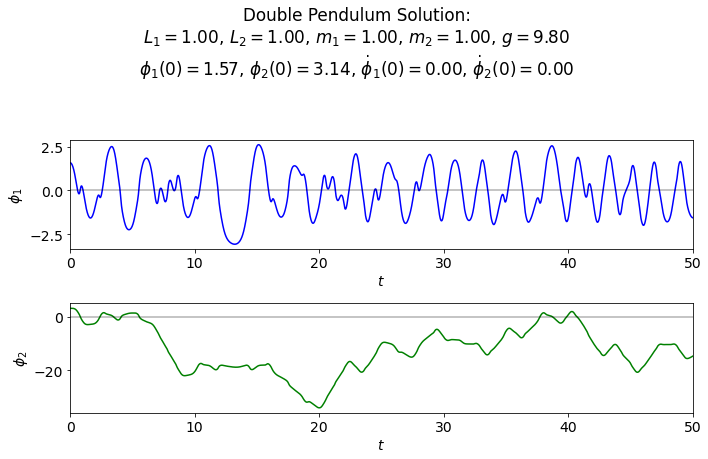

In [3]:
# sample values for double pendulum parameters
L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 9.8

# generate double pendulum instance
dp1 = DoublePendulum(L1, L2, m1, m2, g)

# generate time lattice
tStart = 0.
tEnd = 50.
deltaT = 0.001
tPts = np.arange(tStart, tEnd+deltaT, deltaT)

# set up initial conditions for the double pendulum
phi0 = np.array([np.pi/2., np.pi])
phiDot0 = np.array([0., 0.])

# solve diffeq
phiVec, phiDotVec = dp1.solve_ode(tPts, phi0, phiDot0)

# plot each of the angles versus time
colors = ['blue', 'green']

fig, axes = plt.subplots(2, 1, figsize=(10, 6))
for j in np.arange(2):
    axes[j].plot(tPts, phiVec[j], color=colors[j])
    axes[j].set_xlabel(r'$t$')
    axes[j].set_ylabel(fr'$\phi_{j+1:d}$')
    axes[j].set_xlim(tPts[0], tPts[-1])
    axes[j].axhline(0., color='black', alpha=0.3)
overallTitle = 'Double Pendulum Solution:\n' + fr'$L_1 = {L1:.2f}$, ' + \
                                        fr'$L_2 = {L2:.2f}$, ' + \
                                        fr'$m_1 = {m1:.2f}$, ' + \
                                        fr'$m_2 = {m2:.2f}$, ' + \
                                        fr'$g = {g:.2f}$' + '\n' + \
                                        fr'$\phi_1(0) = {phi0[0]:.2f}$, ' + \
                                        fr'$\phi_2(0) = {phi0[1]:.2f}$, ' + \
                                        fr'$\dot\phi_1(0) = {phiDot0[0]:.2f}$, ' + \
                                        fr'$\dot\phi_2(0) = {phiDot0[1]:.2f}$'
fig.suptitle(overallTitle, va='center')
fig.tight_layout()


print( phi0, phiDot0 )  # debugging check


This is about what we'd expect for a double pendulum. It's sort of all over the place, reflecting the chaotic nature of the system (discussed below). No noticable pattern establishes itself.

But, to get a better handle on things, let's look at both angles on the same graph, for comparison.

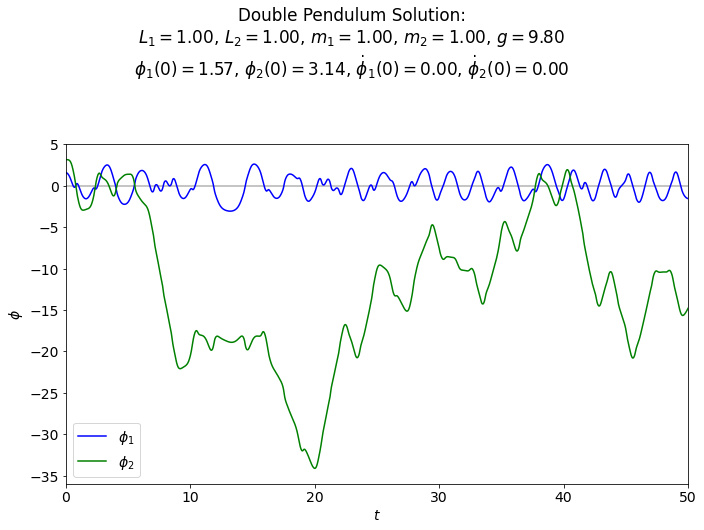

In [4]:
# plot the angles on the same graph so it is easier to compare the coordinates in time
fig = plt.figure(figsize=(10, 7))
overallTitle = 'Double Pendulum Solution:\n' + fr'$L_1 = {L1:.2f}$, ' + \
                                        fr'$L_2 = {L2:.2f}$, ' + \
                                        fr'$m_1 = {m1:.2f}$, ' + \
                                        fr'$m_2 = {m2:.2f}$, ' + \
                                        fr'$g = {g:.2f}$' + '\n' + \
                                        fr'$\phi_1(0) = {phi0[0]:.2f}$, ' + \
                                        fr'$\phi_2(0) = {phi0[1]:.2f}$, ' + \
                                        fr'$\dot\phi_1(0) = {phiDot0[0]:.2f}$, ' + \
                                        fr'$\dot\phi_2(0) = {phiDot0[1]:.2f}$'
fig.suptitle(overallTitle, va='center')

ax = fig.add_subplot(1,1,1)
ax.set_xlabel(r'$t$')
ax.set_ylabel(fr'$\phi$')
ax.set_xlim(tPts[0], tPts[-1])
ax.axhline(0., color='black', alpha=0.3)

ax.plot(tPts, phiVec[0], color='blue', label=rf'$\phi_1$')
ax.plot(tPts, phiVec[1], color='green', label=rf'$\phi_2$')
ax.legend()

fig.tight_layout()

For these particular initial conditions, $\phi_1(0) = \pi/2, \; \phi_2(0) = \pi, \; \dot\phi_1(0) = \dot\phi_2(0) = 0$, its clear that the second bob executes multiple revolutions entirely around the pivot whilst the first bob stays roughly in a semicircular "bowl". As noted above, this sort of behavior is along the lines of what we'd "expect" for a double pendulum.


Now let's turn our attention and investigate that chaos point from earlier. <br>
The key feature of a chaotic system is that it's long term future behavior is practically unpredicatable given a set of initial conditions. You may be able to predict a chaotic system's behavior for some very short timescale, but, given real-world measurable initial conditions the system's future behavior will eventually become nearly entirely uncertain. <br>
One of the ways chaos is expressed in physical systems is in extreme sensitivity to initial conditions. That is, if we have two instances of the exact same system whose initial conditions differ very slightly, the long time behavior of each instance will be totally different from the other. This is ultimately why chaotic systems are impossible to predict; every real-world measurement of the initial conditions has an error. Even if that error is miniscule, it will eventually mean the difference between two totally different motions of the system. <br>

In the case of our double pendulum, recall that in Taylor Chapter 11.4, we saw that for small angles, a double pendulum shouldn't be chaotic at all. Mathematically, we can verify this as follows. <br>

Let's suppose we have two double pendula s.t  $\phi_1(0),\; \phi_2(0) << 1$ for both (we'll keep the initial velocities zero for simplicity). Let's let the initial differences in the initial conditions of these two pendula be $|\Delta\phi_1|_0$ and $|\Delta\phi_2|_0$. If this system really isn't chaotic, then we should expect $|\Delta\phi_1|(t)$ and $|\Delta\phi_2|(t)$ to be roughly constant, or even decreasing, in time. That is, apart from some very short time fluctuations in the discrepancies of the two coordinates, we should expect their discrepancies not to grow over long times. <br>

Let's code this up and see if we're right.

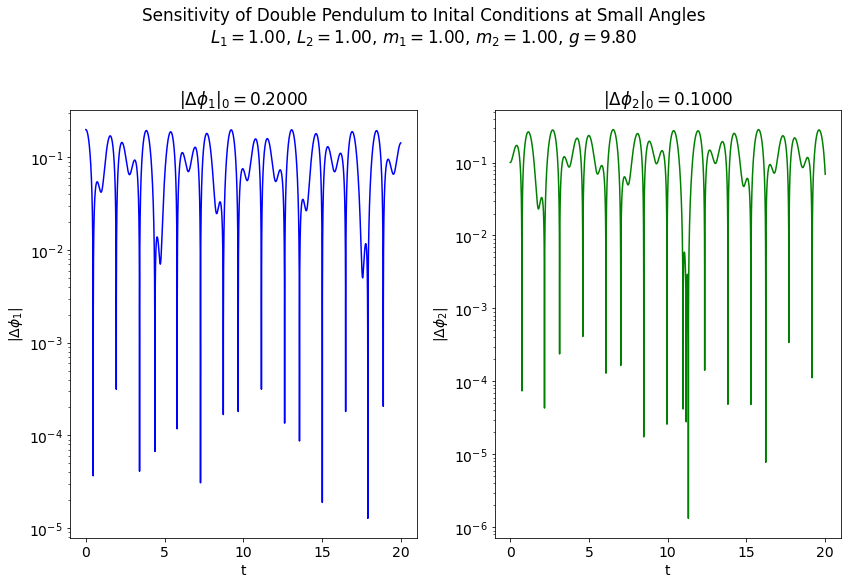

In [5]:
# generate expanded time lattice
tStart = 0.
tEnd = 20.
deltaT = 0.001
tPts = np.arange(tStart, tEnd+deltaT, deltaT)

# set up two sets of initial conditions, which are very slightly different
#  and solve the pendulum above with both
phi0_1 = np.array([0.1, 0.05])
phiDot0_1 = np.array([0., 0.])
phiVec1, phiDotVec1 = dp1.solve_ode(tPts, phi0_1, phiDot0_1)

phi0_2 = np.array([-0.1, -0.05])
phiDot0_2 = np.array([0., 0.])
phiVec2, phiDotVec2 = dp1.solve_ode(tPts, phi0_2, phiDot0_2)

# compute the differences between the positions of each bob
#  from the first and second set of initial conditions
deltaPhi1 = np.fabs(phiVec2[0] - phiVec1[0])
deltaPhi2 = np.fabs(phiVec2[1] - phiVec1[1])

# plot each deltaPhi vs. time
fig = plt.figure(figsize=(12, 8))
overallTitle = 'Sensitivity of Double Pendulum to Inital Conditions at Small Angles\n' + \
                fr'$L_1 = {L1:.2f}$, ' + fr'$L_2 = {L2:.2f}$, ' + \
                fr'$m_1 = {m1:.2f}$, ' + fr'$m_2 = {m2:.2f}$, ' + \
                fr'$g = {g:.2f}$'
fig.suptitle(overallTitle, va='center')

ax_a = fig.add_subplot(1, 2, 1)
ax_a.semilogy(tPts, deltaPhi1, color='blue', label=None)
ax_a.set_title(fr'$|\Delta \phi_1|_0 = {phi0_1[0] - phi0_2[0]:.4f}$')
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta \phi_1|$')

ax_b = fig.add_subplot(1, 2, 2)
ax_b.semilogy(tPts, deltaPhi2, color='green', label=None)
ax_b.set_title(fr'$|\Delta \phi_2|_0 = {phi0_1[1] - phi0_2[1]:.4f}$')
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta \phi_2|$')

                              
fig.tight_layout()


And would you look at that! We were right. Though these graphs both show fluctuations in the discrepancies over very short timescales, both are also cleary bounded above over long time scales. That means that the discrepancies in each coordinate between the two instances do not grow in time, which is indicative of a nonchaotic system. The fact that the discrepancies don't shrink either indicates the absence of an attractor. But this isn't a driven system, so we wouldn't expect one.


Now, that was for small angles. But what about large ones? Well, we can fundamentally run the exact same test, we just relax the assumption that $\phi_1(0),\; \phi_2(0) << 1$. We should, however, ensure that $|\Delta\phi_1|_0$ and $|\Delta\phi_2|_0$ are small, since the extreme sensitivity of chaotic systems to inital conditions tends to be approximately exponential. If the system is chaotic, the discrepancies will grow very rapidly in time (that's why we've been using semilog plots).

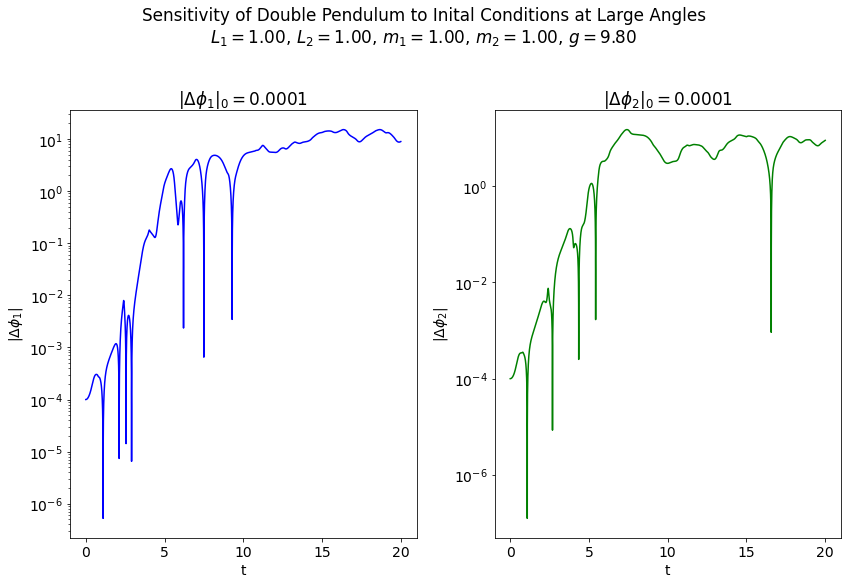

In [6]:
# generate expanded time lattice
tStart = 0.
tEnd = 20.
deltaT = 0.001
tPts = np.arange(tStart, tEnd+deltaT, deltaT)

# set up two sets of initial conditions, which are very slightly different
#  and solve the pendulum above with both
phi0_1 = np.array([4., 2.])
phiDot0_1 = np.array([0., 0.])
phiVec1, phiDotVec1 = dp1.solve_ode(tPts, phi0_1, phiDot0_1)

phi0_2 = np.array([3.9999, 1.9999])
phiDot0_2 = np.array([0., 0.])
phiVec2, phiDotVec2 = dp1.solve_ode(tPts, phi0_2, phiDot0_2)

# compute the differences between the positions of each bob
#  from the first and second set of initial conditions
deltaPhi1 = np.fabs(phiVec2[0] - phiVec1[0])
deltaPhi2 = np.fabs(phiVec2[1] - phiVec1[1])

# plot each deltaPhi vs. time
fig = plt.figure(figsize=(12, 8))
overallTitle = 'Sensitivity of Double Pendulum to Inital Conditions at Large Angles\n' + \
                fr'$L_1 = {L1:.2f}$, ' + fr'$L_2 = {L2:.2f}$, ' + \
                fr'$m_1 = {m1:.2f}$, ' + fr'$m_2 = {m2:.2f}$, ' + \
                fr'$g = {g:.2f}$'
fig.suptitle(overallTitle, va='center')

ax_a = fig.add_subplot(1, 2, 1)
ax_a.semilogy(tPts, deltaPhi1, color='blue', label=None)
ax_a.set_title(fr'$|\Delta \phi_1|_0 = {phi0_1[0] - phi0_2[0]:.4f}$')
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta \phi_1|$')

ax_b = fig.add_subplot(1, 2, 2)
ax_b.semilogy(tPts, deltaPhi2, color='green', label=None)
ax_b.set_title(fr'$|\Delta \phi_2|_0 = {phi0_1[1] - phi0_2[1]:.4f}$')
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta \phi_2|$')

                              
fig.tight_layout()


And would you look at that, it turns out the double pendulum *is* chaotic for large angles. From these two plots you can see that the initial discrepancy in each coordinate is very small, $10^{-4}$, but they grow roughly exponentially (which appears linear on these semilog plots), until by $t = 10$ both discrepancies are essentially at their maximum meaningful values of $~\pi$ (since for a pendulum an uncertainly of $\pm \pi$ is the whole range of the pendulum, because angular coordinates are spatially cyclic, and represents essentially two entirely divergent paths). Notably, the growth here is quite steep, suggesting a low time-constant for the approximate exponential growth. 

The fact that it is exponential at all, however, is enough to demonstrate that the double pendulum is indeed chaotic for initial conditions outside of small angles. 